In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import subject_DM
import helpers
import numpy as np
import collections

Loaded entropies from file (S=15000, entropy_bins=50)!
Loaded dot-level measures from file (S=2000, Smin=20)!


# Checking correlation between possible regressors

<IPython.core.display.Javascript object>


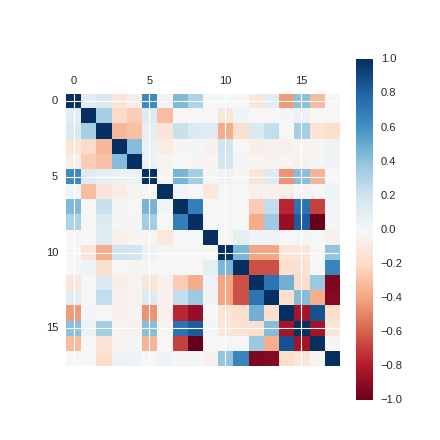

0                      correct
1                           RT
2                      entropy
3                   is_correct
4             is_correct_ideal
5                     response
6                   trial_time
7              correct_ideal_5
8                      dot_x_5
9                      dot_y_5
10           support_correct_5
11    support_previous_ideal_5
12               loglik_left_5
13              loglik_right_5
14              logpost_left_5
15             logpost_right_5
16           m_evidence_left_5
17                  surprise_5
dtype: object

In [5]:
subjects = 2
dots = 5

DM = subject_DM.get_trial_DM(dots, subjects, r_names='all')
img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)

<IPython.core.display.Javascript object>


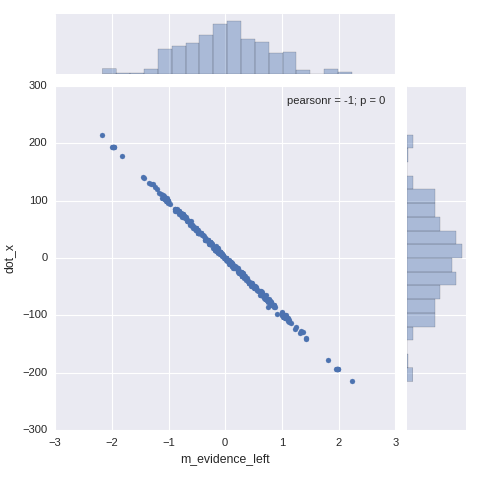

In [3]:
sns.jointplot('m_evidence_left', 'dot_x', data=DM);

<IPython.core.display.Javascript object>


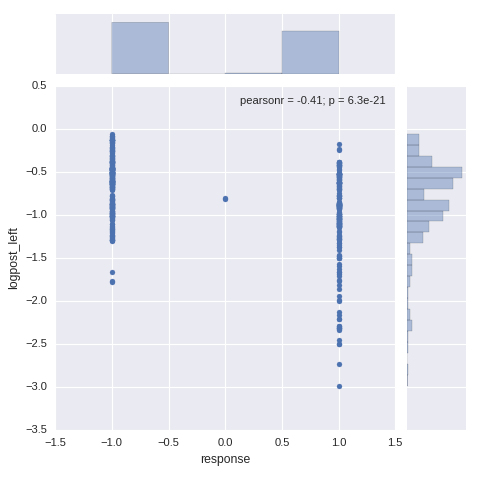

In [4]:
sns.jointplot('response', 'logpost_left', data=DM);

## Selection of regressors with low correlations

<IPython.core.display.Javascript object>


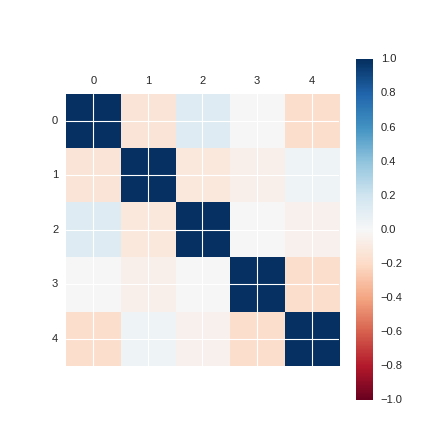

0           entropy
1        trial_time
2           dot_y_5
3    logpost_left_5
4        surprise_5
dtype: object

In [6]:
DM_lowr = subject_DM.get_trial_DM(dots, subjects, r_names=
        ['dot_y', 'surprise', 'logpost_left', 'entropy', 'trial_time'])
img = sns.plt.matshow(DM_lowr.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM_lowr.columns)

### Checking correlation of these regressors across all subjects

In [7]:
DM_all = subject_DM.get_trial_DM(dots, r_names=
        ['dot_y', 'surprise', 'logpost_left', 'entropy', 'trial_time'])
corrs = pd.concat([DM_all.loc[sub].corr() for sub in DM_all.index.levels[0]],
                  keys=DM_all.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
corrs.describe()

,entropy,trial_time,dot_y_5,logpost_left_5,surprise_5
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.043139,0.002547,0.025222,0.015279,-0.076758
std,0.156050,0.047058,0.066951,0.144194,0.076366
min,-0.227120,-0.129165,-0.107936,-0.199143,-0.227120
25%,-0.062628,-0.025000,-0.026991,-0.080243,-0.143238
50%,0.050147,-0.000504,0.006602,-0.000105,-0.052462
75%,0.138306,0.036699,0.067835,0.054030,-0.028064
max,0.625884,0.121142,0.198754,0.625884,0.107995


<IPython.core.display.Javascript object>


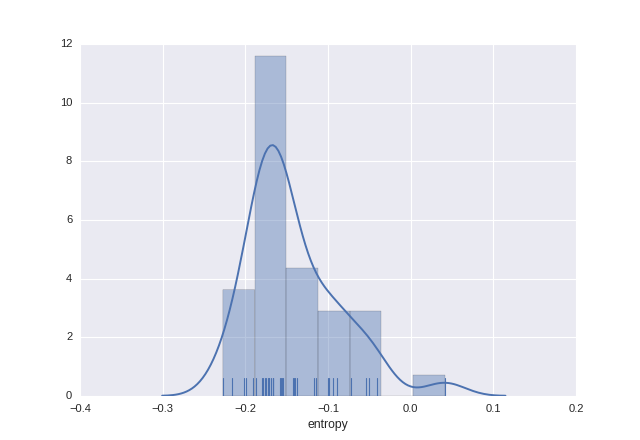

/home/bitzer/programs/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [9]:
sns.plt.figure()
sns.distplot(corrs.xs('surprise_5', level='regressor').entropy, rug=True)

## Checking correlations across dots

<IPython.core.display.Javascript object>


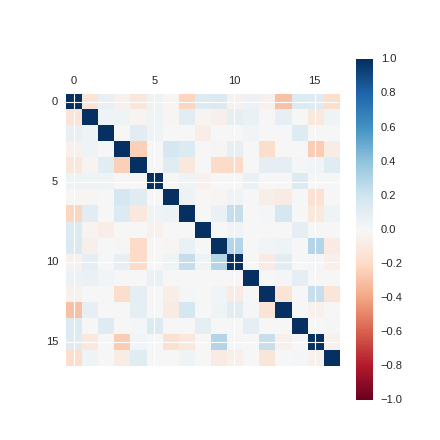

0        entropy
1     trial_time
2        dot_x_1
3        dot_y_1
4     surprise_1
5        dot_x_2
6        dot_y_2
7     surprise_2
8        dot_x_3
9        dot_y_3
10    surprise_3
11       dot_x_4
12       dot_y_4
13    surprise_4
14       dot_x_5
15       dot_y_5
16    surprise_5
dtype: object

In [17]:
DM = subject_DM.get_trial_DM(dots=np.arange(1, 6), subjects=2, r_names=['dot_y', 
            'surprise', 'dot_x', 'entropy', 'trial_time'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)

### Logpost_left

<IPython.core.display.Javascript object>


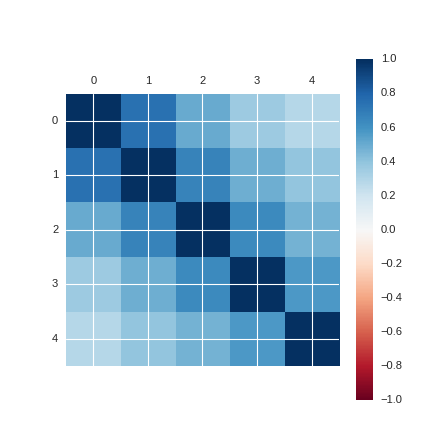

0    logpost_left_1
1    logpost_left_2
2    logpost_left_3
3    logpost_left_4
4    logpost_left_5
dtype: object

In [18]:
DM = subject_DM.get_trial_DM(dots=np.arange(1, 6), subjects=2, r_names=['logpost_left'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)